## <left>Household electric power consumption dataset.
### This is time series dataset and it's intendeted to be used for regression modeling to predict Global_active_power value based on historical data. You should do the following:</left>

1. download the dataset (train and test files)
2. load the dataset via pandas
3. print the dataset size and first rows from the dataset
4. print number of rows with missing values, analyze which columns have the biggest number of missing values
5. analyze values distribution for each column (except Time and Date)
6. analyze the change in daily average Global_active_power. is there any seasonal behaviour? did consumption change with years?
7. for 2 selected dates (2008-02-01 and 2008-02-02) plot the following variables with respect to time:

 * global active power
 * combined plot with measurements of 3 submeters
 * voltage
 * current intensity
 * active energy consumed every minute (in watt hour) not measured in sub-meterings 1, 2 and 3; this can be computed by the given formula:

#### <center>global_active_power * 1000 / 60 - sub_metering_1 - sub_metering_2 - sub_metering_3</center>


8. detect dates with abnormal voltage or current if any
9. analyze correlation between columns
10. perform preprocessing for the dataset by using any of the methods from lecture 4. the result of this step must be a dataset (X and y) that can be used for modelling
11. generate automatic report for the dataset via pandas_profiling library

In [1]:
import math
import warnings
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
from scipy import stats
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option("display.precision", 2)
sns.set(style="whitegrid", color_codes=True)

In [2]:
_format = '%(message)s'
logging.basicConfig(level=logging.INFO, format=_format)
logger = logging.getLogger(__name__)

In [3]:
data_path = Path('data')
data = 'household_power_consumption.csv'
stat_html = 'insurance.html'

In [4]:
df = pd.read_csv(data_path.joinpath(data), 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.22,0.42,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.36,0.44,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.37,0.50,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.39,0.50,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.67,0.53,235.68,15.8,0.0,1.0,17.0


In [6]:
df.shape

(2075259, 7)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2.05e+06,1.09,1.06,0.08,0.31,0.60,1.53,11.12
Global_reactive_power,2.05e+06,0.12,0.11,0.00,0.05,0.10,0.19,1.39
Voltage,2.05e+06,240.84,3.24,223.20,238.99,241.01,242.89,254.15
Global_intensity,2.05e+06,4.63,4.44,0.20,1.40,2.60,6.40,48.40
Sub_metering_1,2.05e+06,1.12,6.15,0.00,0.00,0.00,0.00,88.00
Sub_metering_2,2.05e+06,1.30,5.82,0.00,0.00,0.00,1.00,80.00
Sub_metering_3,2.05e+06,6.46,8.44,0.00,0.00,1.00,17.00,31.00


In [8]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [78]:
def get_profiling(_df, output_name):
    profile = pandas_profiling.ProfileReport(df=_df)
    profile.to_file(output_name)

In [79]:
get_profiling(df, stat_html)

Text(0.5, 1, 'Missing values heatmap')

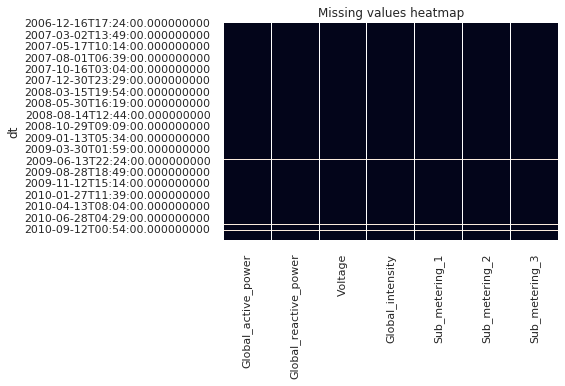

In [9]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [49]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [52]:
# Handling missing values
df.replace("?", np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
# ###### df.reset_index(drop=True, inplace=True)

Text(0.5, 1, 'Missing values heatmap')

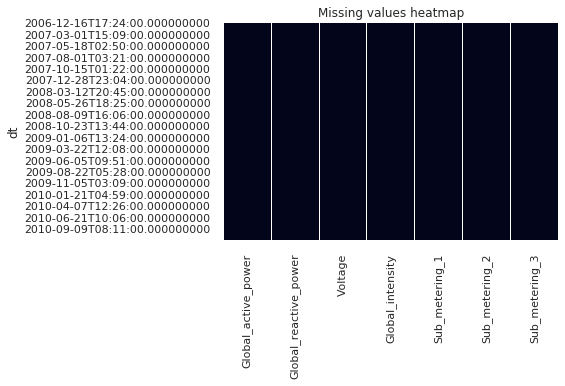

In [12]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")

In [53]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [50]:
df.shape

(2075259, 7)

In [51]:
numeric_df = df._get_numeric_data()
# numeric_df.head()
numeric_columns = numeric_df.columns
numeric_columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [16]:
def plotNumeric(attribute, ax_index):
    sns.distplot(numeric_df[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=attribute, ylabel='density')
#     sns.violinplot(x='Global_active_power', y=attribute, data=numeric_df, ax=axes[ax_index][1])
    
def plotGrid():
    [plotNumeric(x, i) for i, x in enumerate(numeric_columns)]

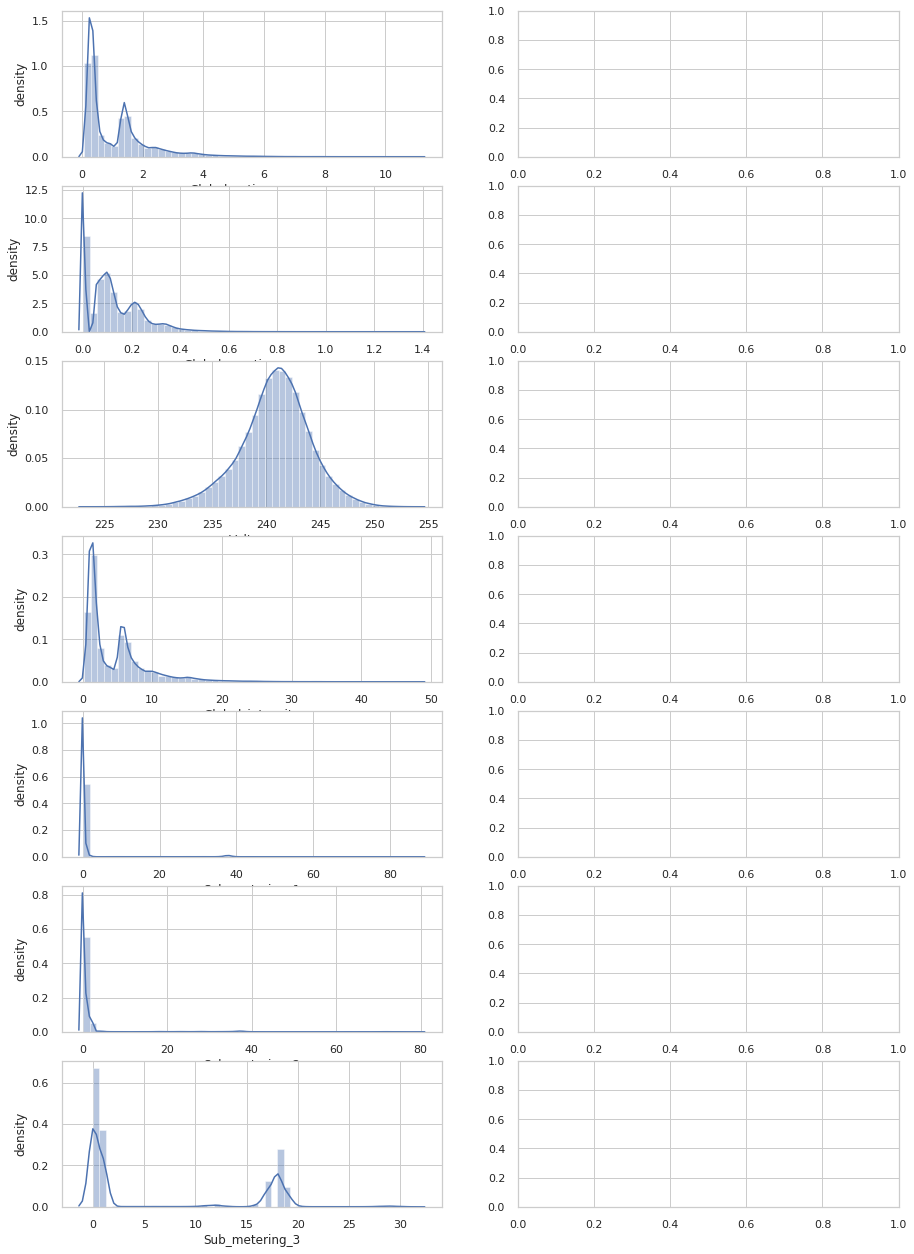

In [17]:
fig_numeric, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(15, 22))
plotGrid()

In [56]:
daily_groups = df.resample('D')
# weekly_groups = df.resample('W')

daily_data_sum = daily_groups.sum()
daily_data_mean = daily_groups.mean()
daily_data_median = daily_groups.median()

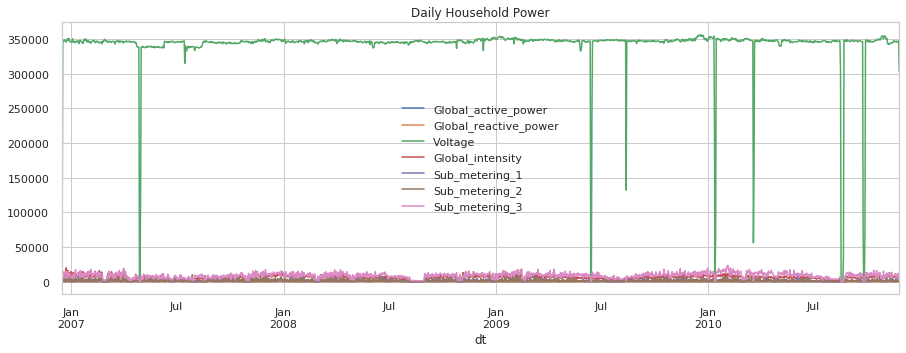

In [80]:
ax = daily_data_sum.plot(title='Daily Household Power', figsize=(15,5))

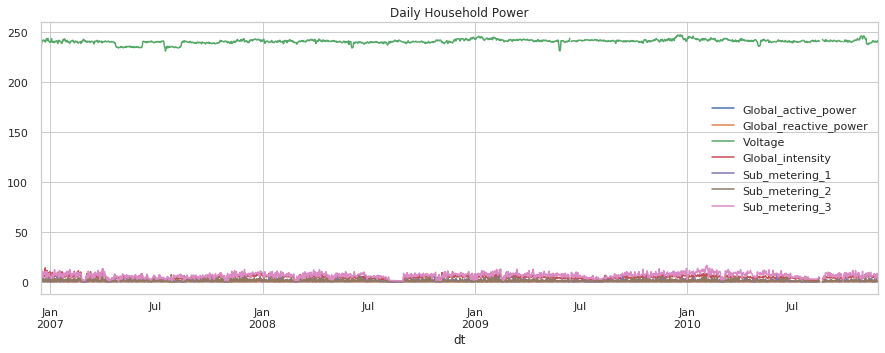

In [81]:
ax = daily_data_mean.plot(title='Daily Household Power', figsize=(15,5))

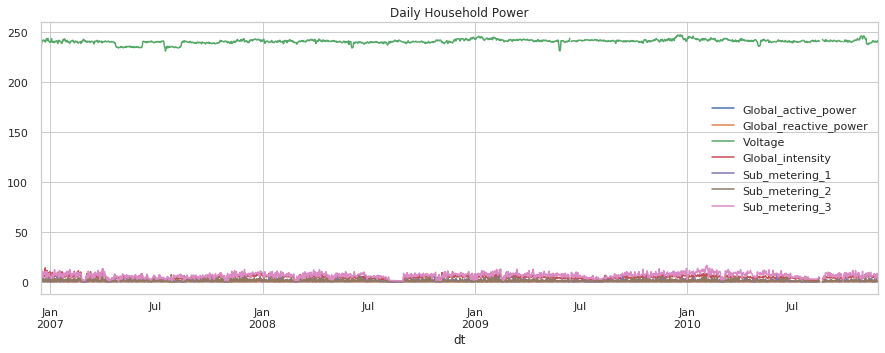

In [82]:
ax = daily_data_mean.plot(title='Daily Household Power', figsize=(15,5))

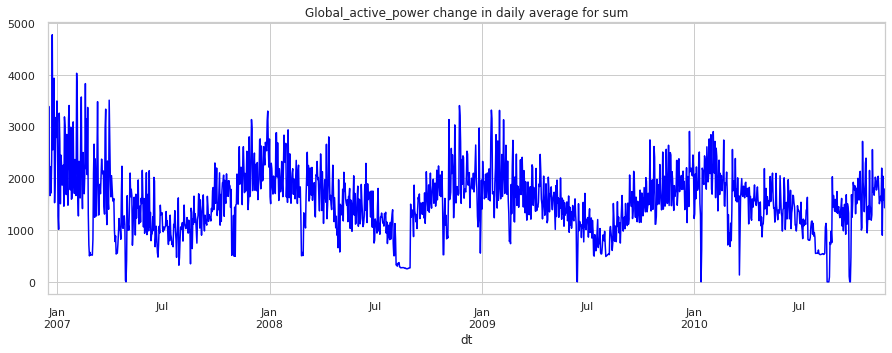

In [184]:
ax = daily_data_sum.Global_active_power.plot(title='Global_active_power change in daily average for sum', color='blue', figsize=(15,5))

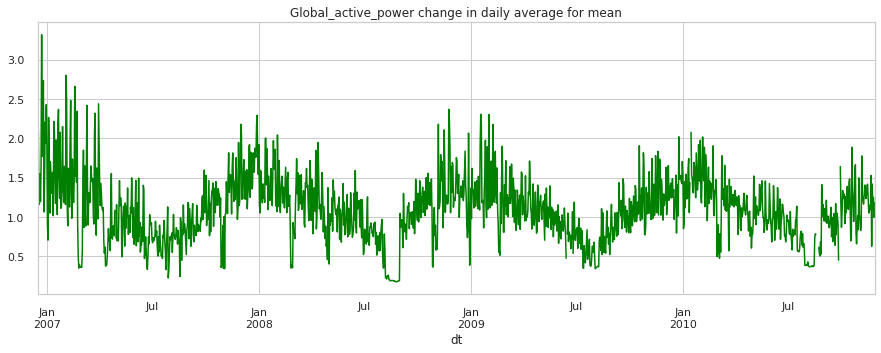

In [185]:
ax = daily_data_mean.Global_active_power.plot(title='Global_active_power change in daily average for mean', color='green', figsize=(15,5))

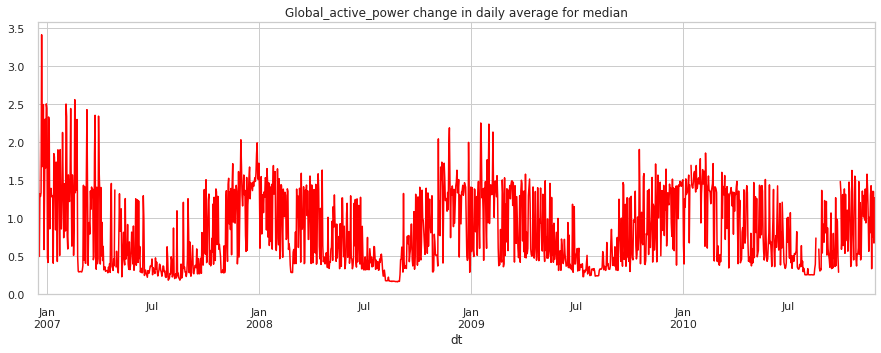

In [186]:
ax = daily_data_median.Global_active_power.plot(title='Global_active_power change in daily average for median', color='red', figsize=(15,5))

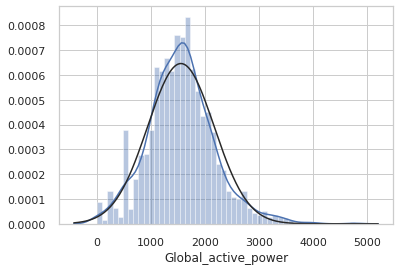

In [66]:
from scipy.stats import norm
ax = sns.distplot(daily_data_sum['Global_active_power'], fit=norm, bins=50, kde=True);

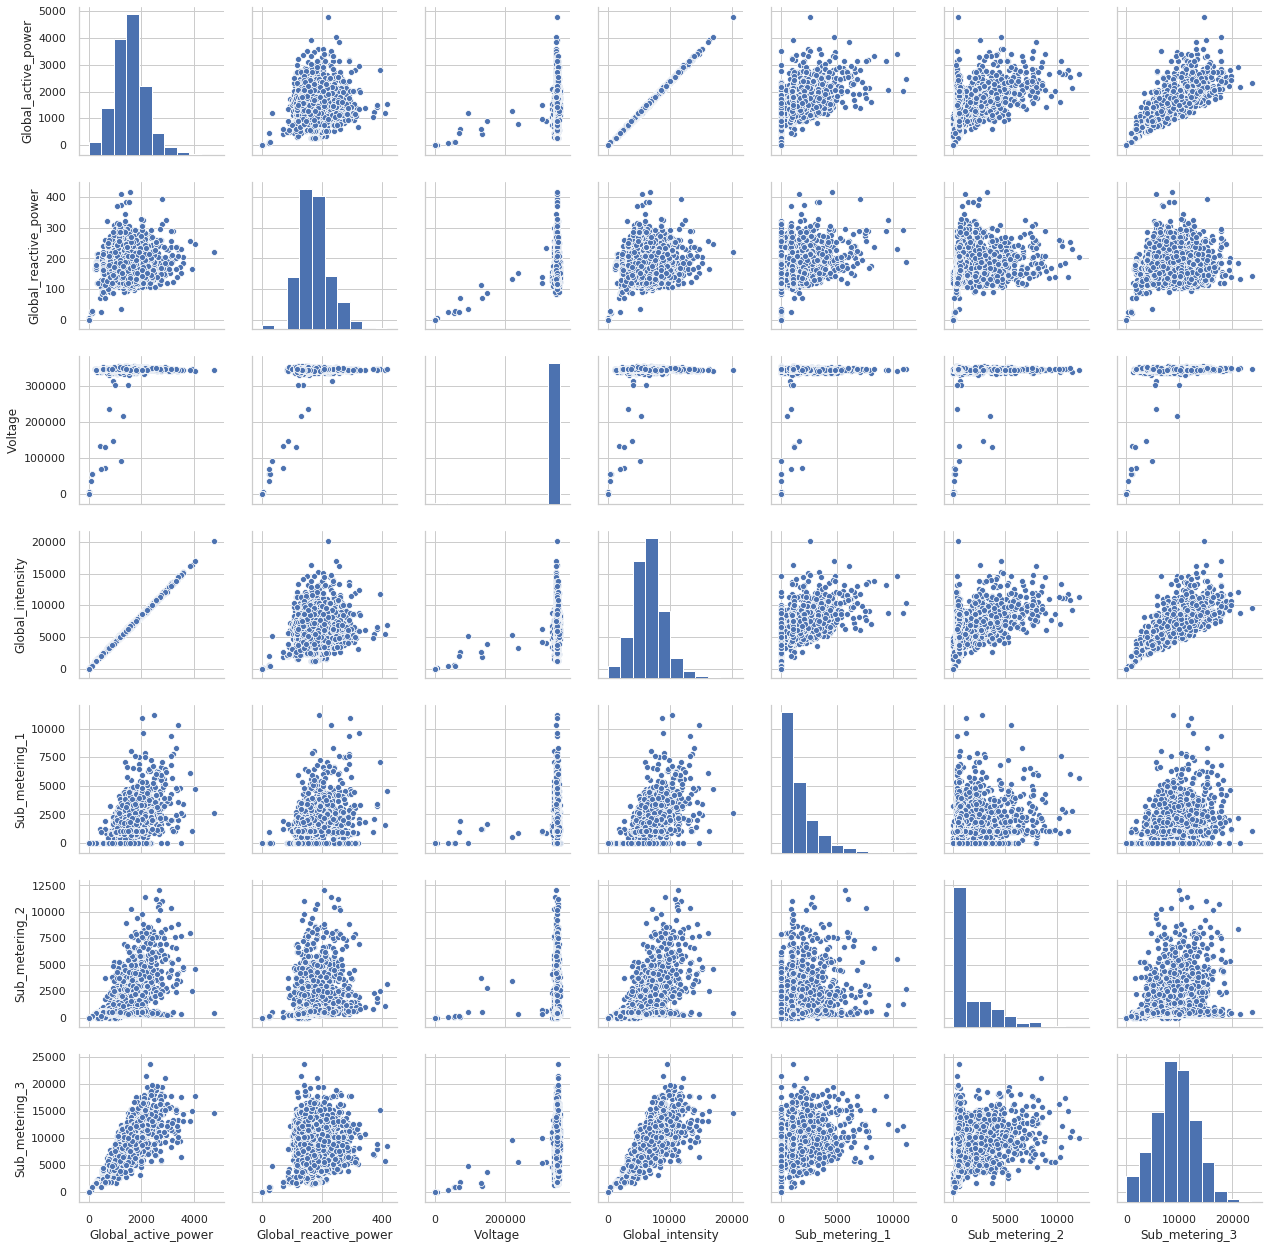

In [70]:
ax = sns.pairplot(daily_data_sum, height = 2.5)

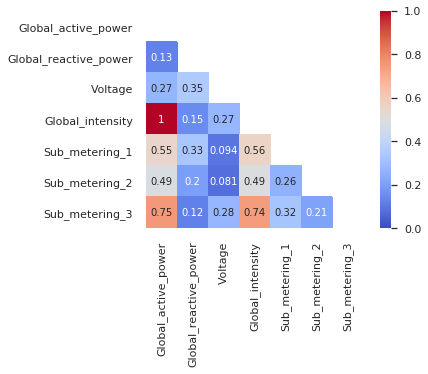

In [76]:
pearson = daily_data_sum.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="coolwarm", mask=mask);

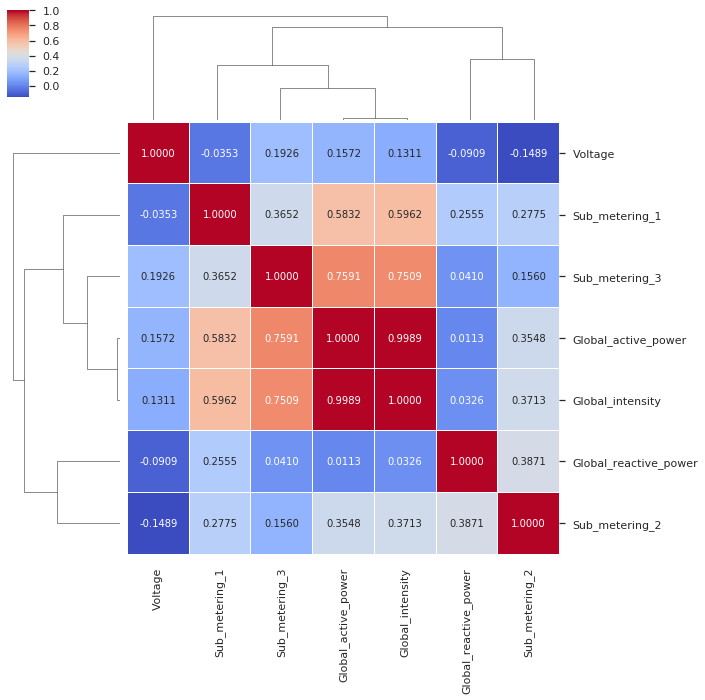

In [83]:
pearson = daily_data_sum.corr(method='spearman')
cg = sns.clustermap(pearson, cmap='coolwarm', linewidths=0.1, annot=True, fmt=".4f", square=True);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

In [6]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.22,0.42,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.36,0.44,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.37,0.50,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.39,0.50,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.67,0.53,235.68,15.8,0.0,1.0,17.0


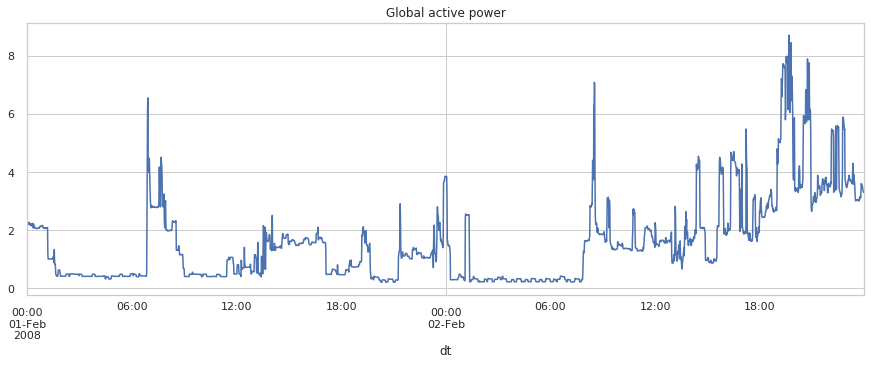

In [7]:
global_active_power = df.loc['2008-02-01':'2008-02-02','Global_active_power']
ax = global_active_power.plot(title='Global active power', figsize=(15,5))

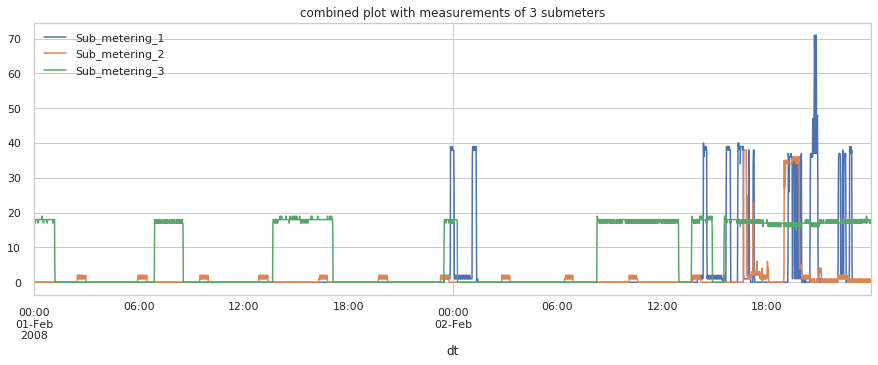

In [8]:
sub_meterings = df.loc['2008-02-01':'2008-02-02','Sub_metering_1':'Sub_metering_3']
ax = sub_meterings.plot(title='combined plot with measurements of 3 submeters', figsize=(15,5))


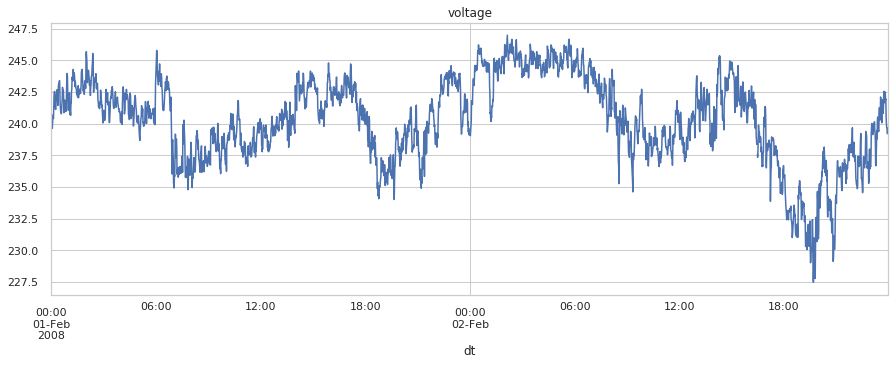

In [9]:
selected = df.loc['2008-02-01':'2008-02-02','Voltage']
ax = selected.plot(title='voltage', figsize=(15,5))

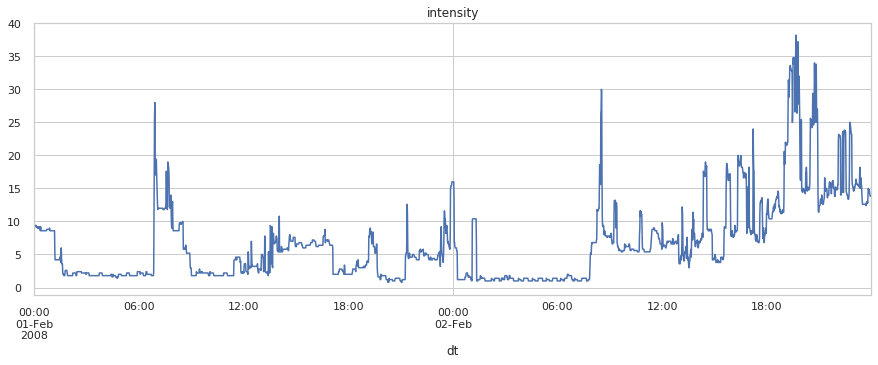

In [10]:
selected = df.loc['2008-02-01':'2008-02-02','Global_intensity']
ax = selected.plot(title='intensity', figsize=(15,5))

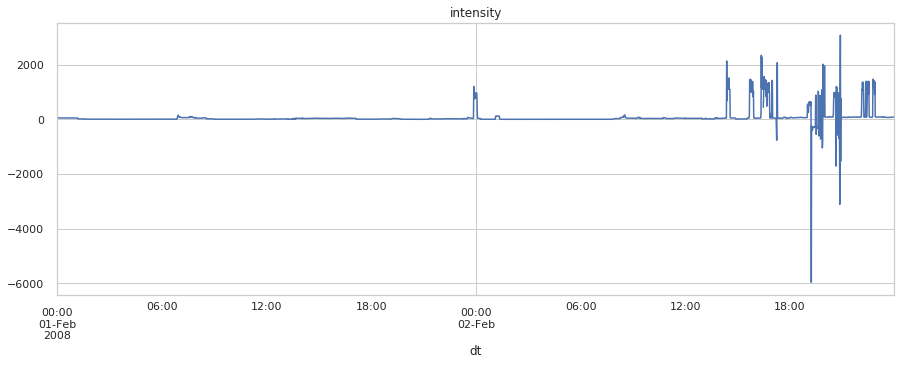

In [11]:
# sub_meterings_sum = 60 - sub_meterings.sum(axis=1)
# active_energy = (global_active_power*1000)
active_energy = (global_active_power*1000) / (60 - sub_meterings.sum(axis=1))
# active_energy.head() , sub_meterings_sum.head()
ax = active_energy.plot(title='intensity', figsize=(15,5))

In [54]:
def get_xy(_df, target="Global_active_power"):
    return _df.drop(target, axis=1), _df[target]

In [55]:
X, y = get_xy(df)

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (
    StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
)
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split( X, y ,
                                                    test_size=0.1, 
                                                    random_state=42)

In [70]:
scaler.fit(X_train) 
X_train_normed = pd.DataFrame(scaler.transform(X_train))
X_test_normed = pd.DataFrame(scaler.transform(X_test))
X_train_normed.head()

,0,1,2,3,4,5
0,0.54,-0.52,-0.55,-0.18,-0.05,-0.77
1,-0.58,-0.43,0.35,-0.02,-0.22,1.37
2,-0.42,1.06,-0.64,-0.18,-0.22,-0.77
3,-1.10,-1.14,-0.82,-0.18,-0.22,-0.77
4,1.01,-0.07,-0.64,-0.18,-0.05,-0.77


In [58]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [59]:
X_train_normed.describe()

,0,1,2,3,4,5
count,1.84e+06,1.84e+06,1.84e+06,1.84e+06,1.84e+06,1.84e+06
mean,-4.00e-16,4.03e-16,-2.06e-16,6.28e-17,1.86e-17,-1.67e-17
std,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
min,-1.10e+00,-5.45e+00,-9.97e-01,-1.82e-01,-2.23e-01,-7.65e-01
25%,-6.71e-01,-5.71e-01,-7.27e-01,-1.82e-01,-2.23e-01,-7.65e-01
50%,-2.10e-01,5.21e-02,-4.56e-01,-1.82e-01,-2.23e-01,-6.47e-01
75%,6.24e-01,6.33e-01,3.99e-01,-1.82e-01,-5.10e-02,1.25e+00
max,1.12e+01,4.11e+00,9.86e+00,1.41e+01,1.35e+01,2.91e+00


In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
y_predict_test = lr.predict(X_test)
logger.info(f'ScoreTest R^2: {lr.score(X_test, y_predict_test)}')
logger.info(f'R^2: {lr.score(X_train, y_train)}')

ScoreTest R^2: 1.0
R^2: 0.9985201527391216


In [71]:
mse = np.average((y_predict-y_test)**2)
logger.info(f'mse: {mse}')
rmse = np.sqrt(mse)
logger.info(f'rmse: {rmse}')

mse: 0.0016300915319716976
rmse: 0.04037439203222381
